In [6]:
import cv2
from src.preprocessing import square_resize
import os
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt


## Investigate smallest image size

In [2]:
shapes = []

for filename in tqdm(os.listdir("data/cfp")):
    file = f"data/cfp/{filename}"
    img = cv2.imread(file)
    shapes.append(img.shape)

100%|██████████| 15000/15000 [24:11<00:00, 10.34it/s] 


In [15]:
heights = [shape[0] for shape in shapes]
min(heights)

682

In [16]:
width = [shape[1] for shape in shapes]
min(width)

1024

In [17]:
cols = [shape[2] for shape in shapes] # just to make sure
min(cols)

3

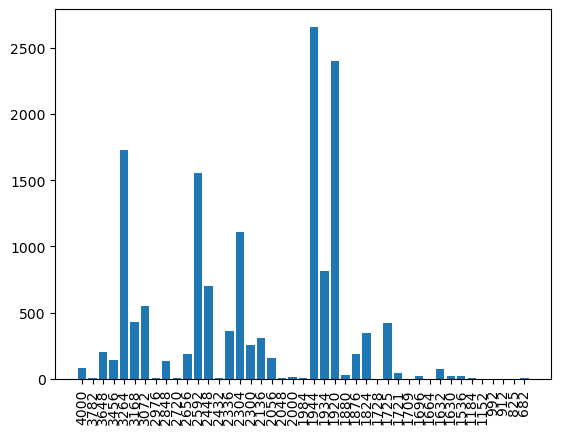

In [25]:
heightcounts = Counter(heights)

heightcounts = dict(sorted(heightcounts.items(), key=lambda item: item[0], reverse=True))

names = list(heightcounts.keys())
values = list(heightcounts.values())

plt.bar(range(len(heightcounts)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

It seems like we would keep the most quality if we use resize the pictures to size (1920 x 1920)

## Image size distribution

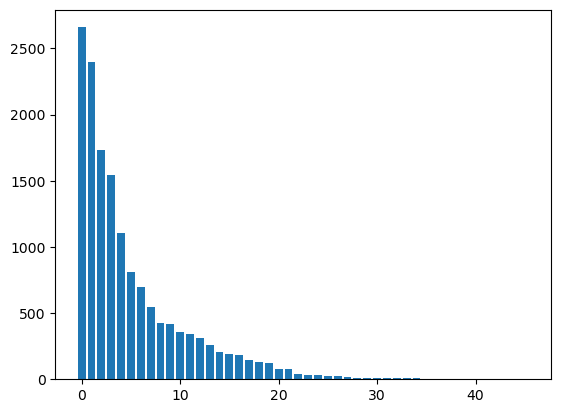

In [14]:
counts = Counter(shapes)
len(counts.items())
counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

names = list(counts.keys())
values = list(counts.values())

plt.bar(range(len(counts)), values) #, tick_label=names
plt.show()


## Resize and square images

In [28]:
for filename in tqdm(os.listdir("data/cfp")[:20]):
    file = f"data/cfp/{filename}"
    img = cv2.imread(file)
    square = square_resize(img, 1920)
    cv2.imwrite(f"data/square_retina/{filename}", square)


100%|██████████| 20/20 [00:12<00:00,  1.64it/s]


## Demonstration on single file

In [8]:
img = cv2.imread('data/cfp/DEV00000.jpg')
print(img.shape)

(3264, 4928, 3)


In [4]:
square = square_resize(img, 500)
square.shape

(500, 500, 3)

In [5]:
cv2.imshow("square", square)
cv2.waitKey(0)